In [1]:
## Step 1, Design research question, Select Variables from model

In [2]:
### Target variable is ReAdmis.  Correlation > .02 for explanatory variable selection

In [3]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import zscore

In [4]:
# Read in medical_clean datafile
df = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

## Environment Details

In [5]:
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [6]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


## Cleaning, Preparation, Manipulation 

In [7]:
#Rename columns for dataset cohesiveness and readability
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat','Item3':'Timely_vis','Item4':'Reliability','Item5':'Options','Item6':'Hours','Item7':'Courteous','Item8':'Listen'},inplace=True)

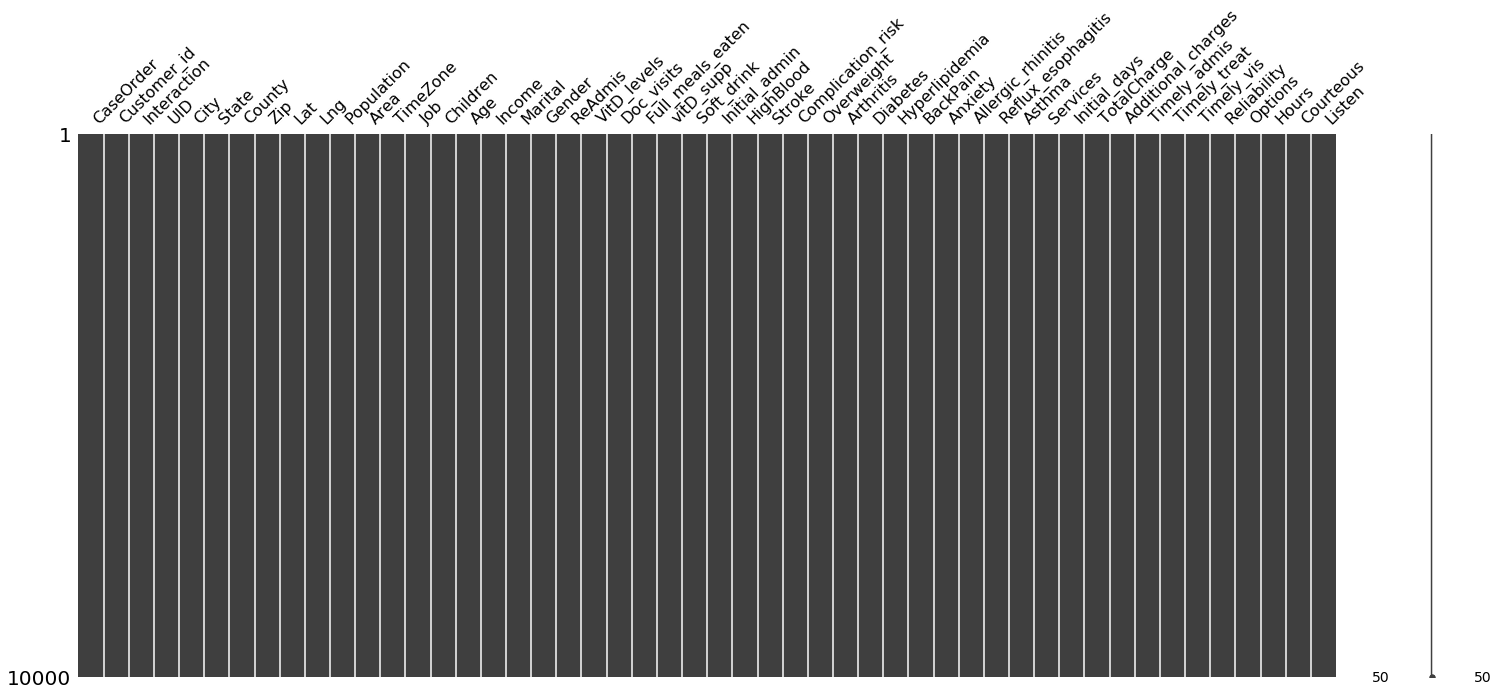

In [8]:
# Check for null values
msno.matrix(df)

In [9]:
# Overview of data set - type, null count, variable names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

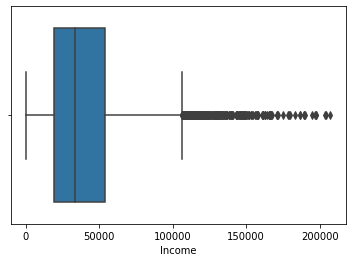

In [10]:
sns.boxplot(df['Income'])

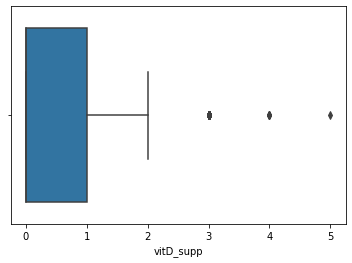

In [11]:
sns.boxplot(df['vitD_supp'])

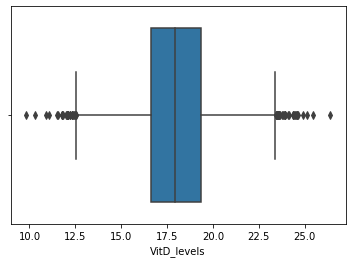

In [12]:
sns.boxplot(df['VitD_levels'])

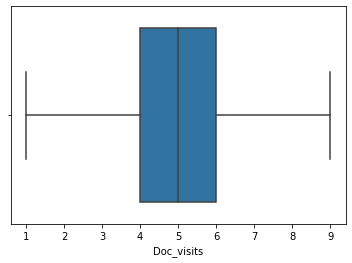

In [13]:
sns.boxplot(df['Doc_visits'])

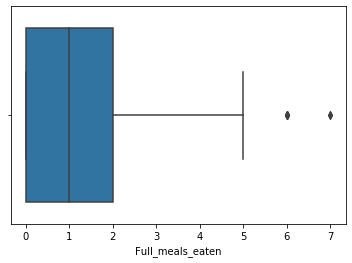

In [14]:
sns.boxplot(df['Full_meals_eaten'])

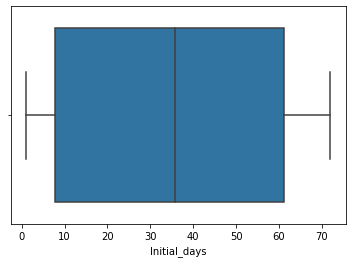

In [15]:
sns.boxplot(df['Initial_days'])

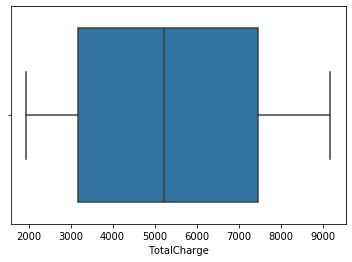

In [16]:
sns.boxplot(df['TotalCharge'])

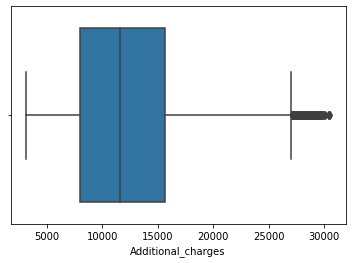

In [17]:
sns.boxplot(df['Additional_charges'])

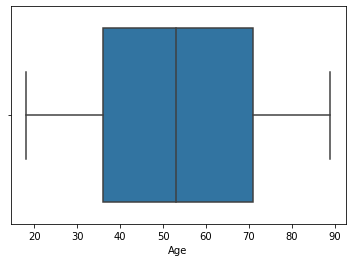

In [18]:
sns.boxplot(df['Age'])

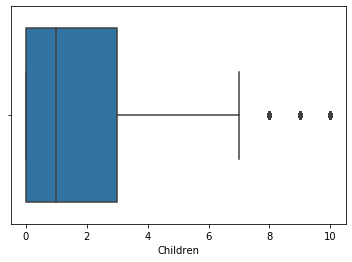

In [19]:
sns.boxplot(df['Children'])

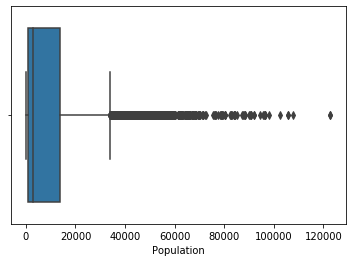

In [20]:
sns.boxplot(df['Population'])

In [21]:
# Outlier removal method via Z-score, Code reference (Bushmanov, 2019)
num_data = df.select_dtypes(include=['number'])
cat_data = df.select_dtypes(exclude=['number'])

In [22]:
idx = np.all(stats.zscore(num_data) <3, axis=1)

In [23]:
df = pd.concat([num_data.loc[idx], cat_data.loc[idx]], axis=1)

In [24]:
# Target variable, change responses to numerical binary
df['ReAdmis'].replace(('Yes','No'), (1,0), inplace=True)

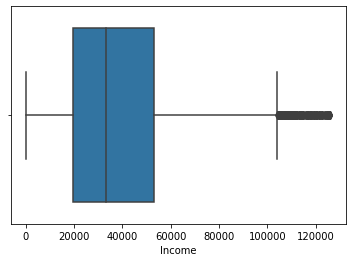

In [25]:
sns.boxplot(df['Income'])

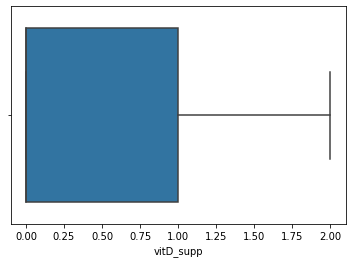

In [26]:
sns.boxplot(df['vitD_supp'])

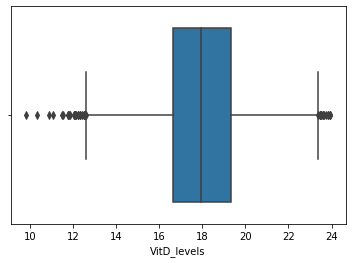

In [27]:
sns.boxplot(df['VitD_levels'])

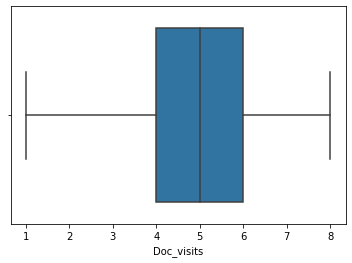

In [28]:
sns.boxplot(df['Doc_visits'])

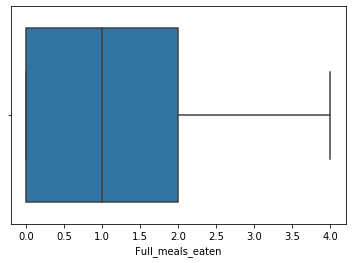

In [29]:
sns.boxplot(df['Full_meals_eaten'])

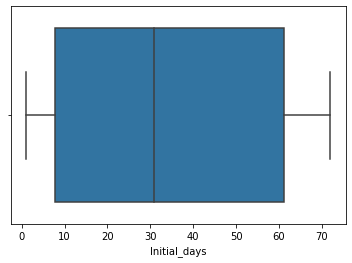

In [30]:
sns.boxplot(df['Initial_days'])

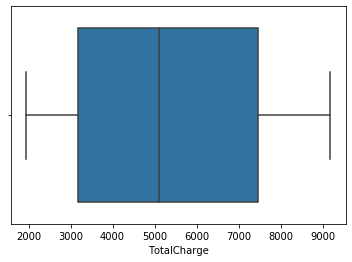

In [31]:
sns.boxplot(df['TotalCharge'])

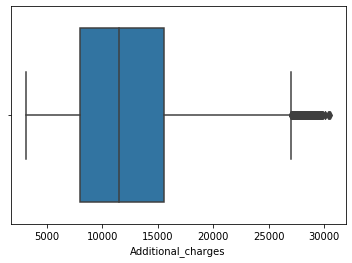

In [32]:
sns.boxplot(df['Additional_charges'])

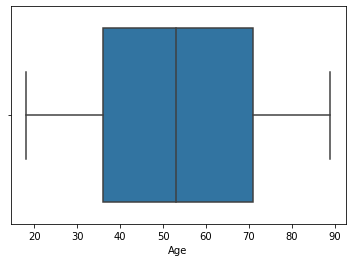

In [33]:
sns.boxplot(df['Age'])

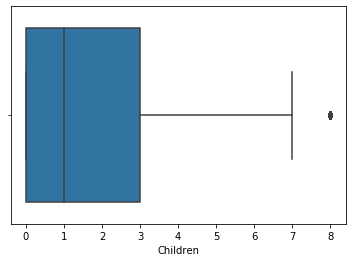

In [34]:
sns.boxplot(df['Children'])

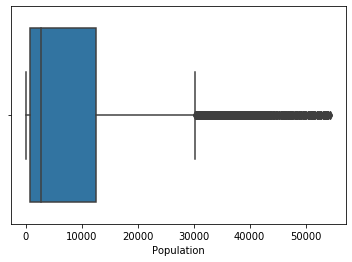

In [35]:
sns.boxplot(df['Population'])

## Univariate Visualization
### Histograms to look at
### Feature Distribution and Normality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECC022FB08>,
      dtype=object)

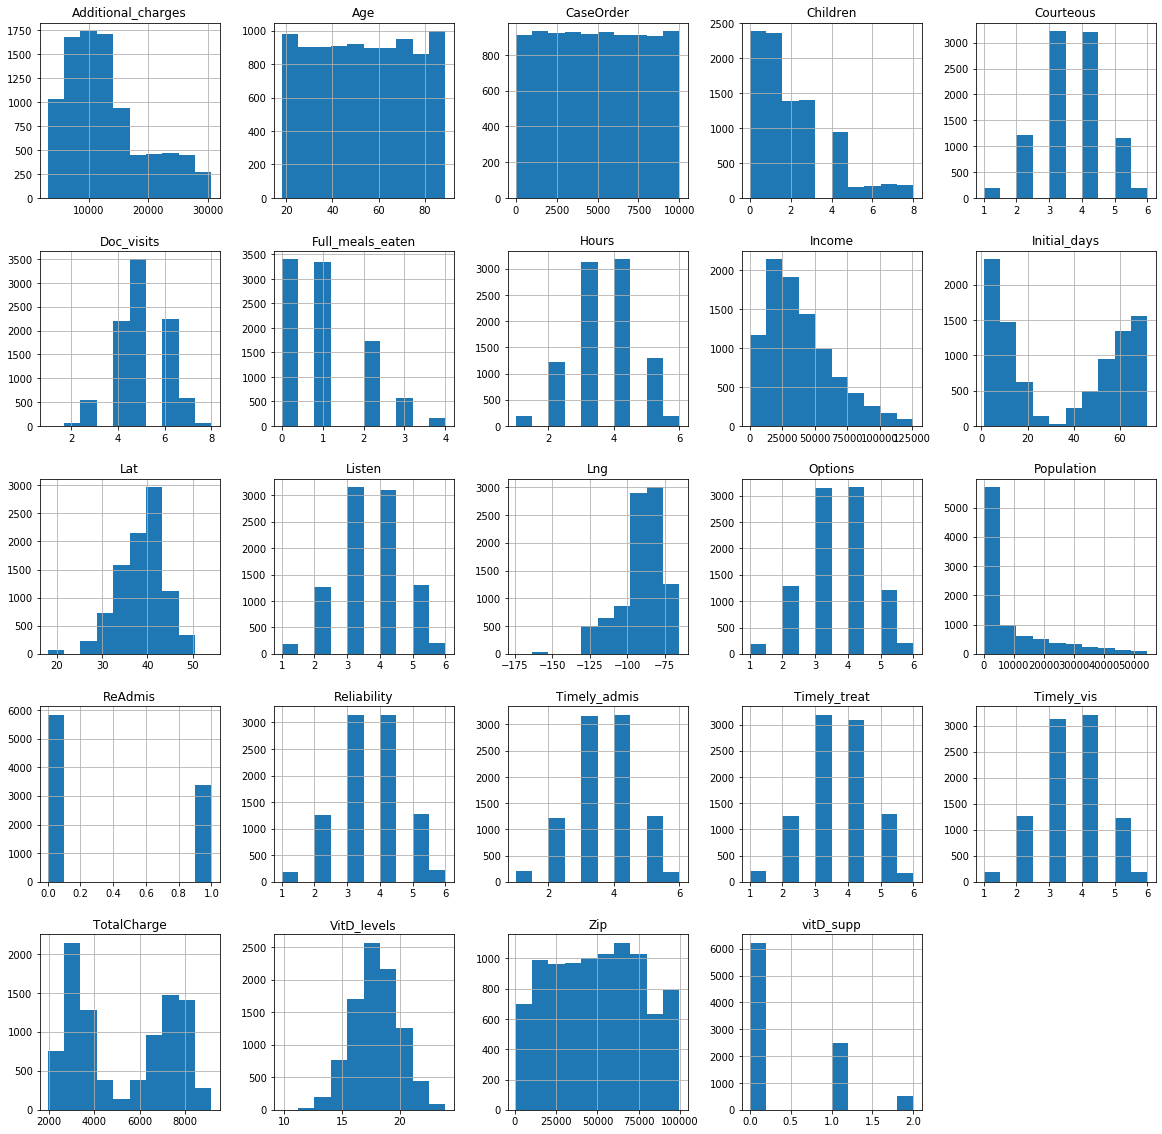

In [36]:
df.hist(figsize=(20,20))

## Bivariate Visualization
### Scatterplots with 
#### X-Axis = Additional_charges
#### Y-Axis = Independent feature

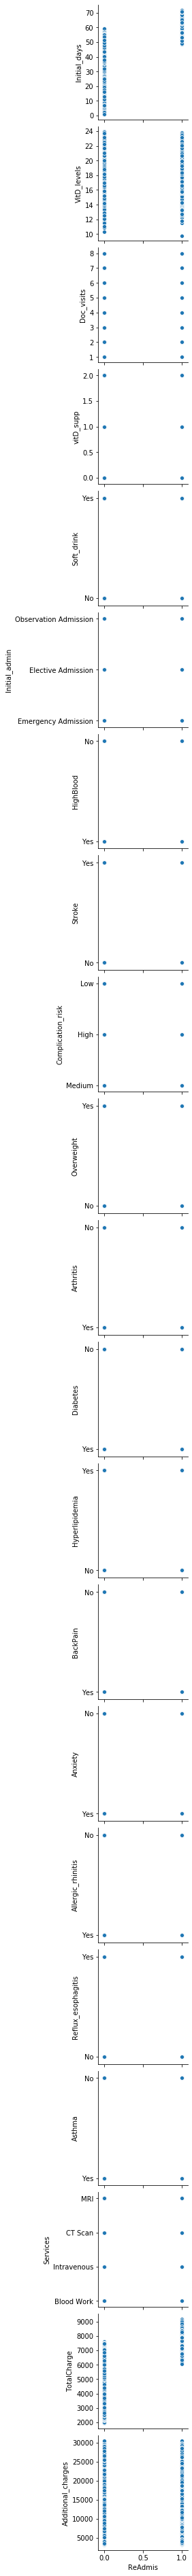

In [37]:
sns.pairplot(df, x_vars=['ReAdmis'], y_vars=['Initial_days','VitD_levels','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services','TotalCharge','Additional_charges'])

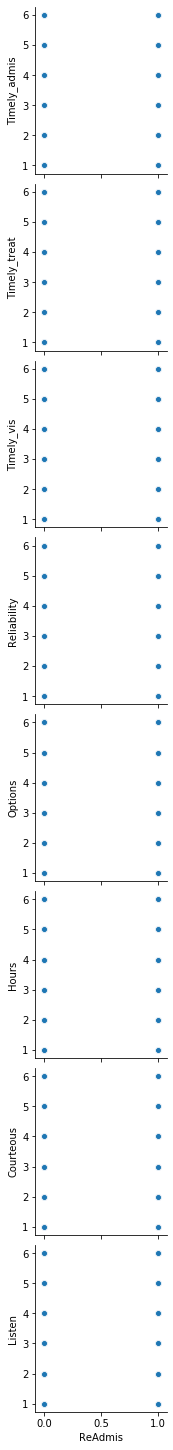

In [38]:
sns.pairplot(df, x_vars=['ReAdmis'], y_vars=['Timely_admis','Timely_treat','Timely_vis','Reliability','Options','Hours','Courteous','Listen'])

In [39]:
#Get dummies code reference (Pandas.get_dummies, N.d.) 
df = pd.get_dummies(df, columns=['Area','Marital','Gender','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services'], drop_first=True)

In [40]:
df = pd.get_dummies(df, columns=['Timely_admis','Timely_treat','Timely_vis','Reliability','Options','Hours','Courteous','Listen'],drop_first=True)


In [41]:
df = pd.get_dummies(df, columns=['ReAdmis'],drop_first=True)

In [42]:
df = pd.get_dummies(df, columns=['Children'],drop_first=True)

In [43]:
#Rename features with spaces in name for future analysis
df.rename(columns={'Services_CT Scan':'Services_CT_Scan','Marital_Never Married':'Marital_Never_Married','Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission','Initial_admin_Observation Admission':'Initial_admin_Observation_Admission'},inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Columns: 105 entries, CaseOrder to Children_8
dtypes: float64(7), int64(5), object(8), uint8(85)
memory usage: 2.2+ MB


In [45]:
df.corr()

,CaseOrder,Zip,Lat,Lng,Population,Age,Income,VitD_levels,Full_meals_eaten,Initial_days,...,Listen_6,ReAdmis_1,Children_1,Children_2,Children_3,Children_4,Children_5,Children_6,Children_7,Children_8
CaseOrder,1.000000,0.010465,-0.012946,-0.012081,0.001489,-0.003011,-0.012265,-0.015026,-0.020805,0.831426,...,-0.014306,0.661462,-0.033383,0.001544,0.014903,0.011868,-0.001672,0.013230,0.000733,0.004166
Zip,0.010465,1.000000,-0.084258,-0.913573,0.012947,-0.003327,0.010507,-0.010747,0.013077,0.011103,...,-0.005841,0.009519,-0.000955,-0.017824,0.010286,-0.010340,0.003784,0.000098,0.009911,0.025547
Lat,-0.012946,-0.084258,1.000000,0.001062,-0.187334,-0.000132,-0.015414,-0.005158,-0.001353,-0.009938,...,0.018726,-0.012324,-0.014191,-0.009076,0.000474,0.010405,0.021356,-0.020881,0.006720,0.006500
Lng,-0.012081,-0.913573,0.001062,1.000000,-0.018263,0.002780,-0.008175,0.000931,-0.013120,-0.006659,...,0.007310,-0.004241,0.001331,0.021534,-0.018374,0.009916,-0.005049,0.008090,-0.006050,-0.028345
Population,0.001489,0.012947,-0.187334,-0.018263,1.000000,-0.018884,0.002162,0.004719,-0.025711,0.004435,...,-0.009906,0.007563,0.003298,0.004140,0.004928,-0.003323,0.005497,0.002481,-0.007526,0.009924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Children_4,0.011868,-0.010340,0.010405,0.009916,-0.003323,-0.003005,0.011490,-0.006051,0.003615,0.021351,...,-0.002160,0.022959,-0.197647,-0.141982,-0.143063,1.000000,-0.043933,-0.047295,-0.050577,-0.048896
Children_5,-0.001672,0.003784,0.021356,-0.005049,0.005497,0.022290,0.008891,-0.001607,-0.011876,-0.001752,...,0.003276,0.002622,-0.076538,-0.054982,-0.055401,-0.043933,1.000000,-0.018315,-0.019586,-0.018935
Children_6,0.013230,0.000098,-0.020881,0.008090,0.002481,-0.009710,0.006582,0.012478,0.008461,0.016965,...,0.000194,0.015853,-0.082396,-0.059190,-0.059641,-0.047295,-0.018315,1.000000,-0.021085,-0.020384
Children_7,0.000733,0.009911,0.006720,-0.006050,-0.007526,-0.000799,0.003081,0.013216,-0.015356,0.005094,...,0.002404,0.005390,-0.088114,-0.063297,-0.063780,-0.050577,-0.019586,-0.021085,1.000000,-0.021798


Text(0.5, 1, 'Variables correlating with ReAdmis Heatmap')

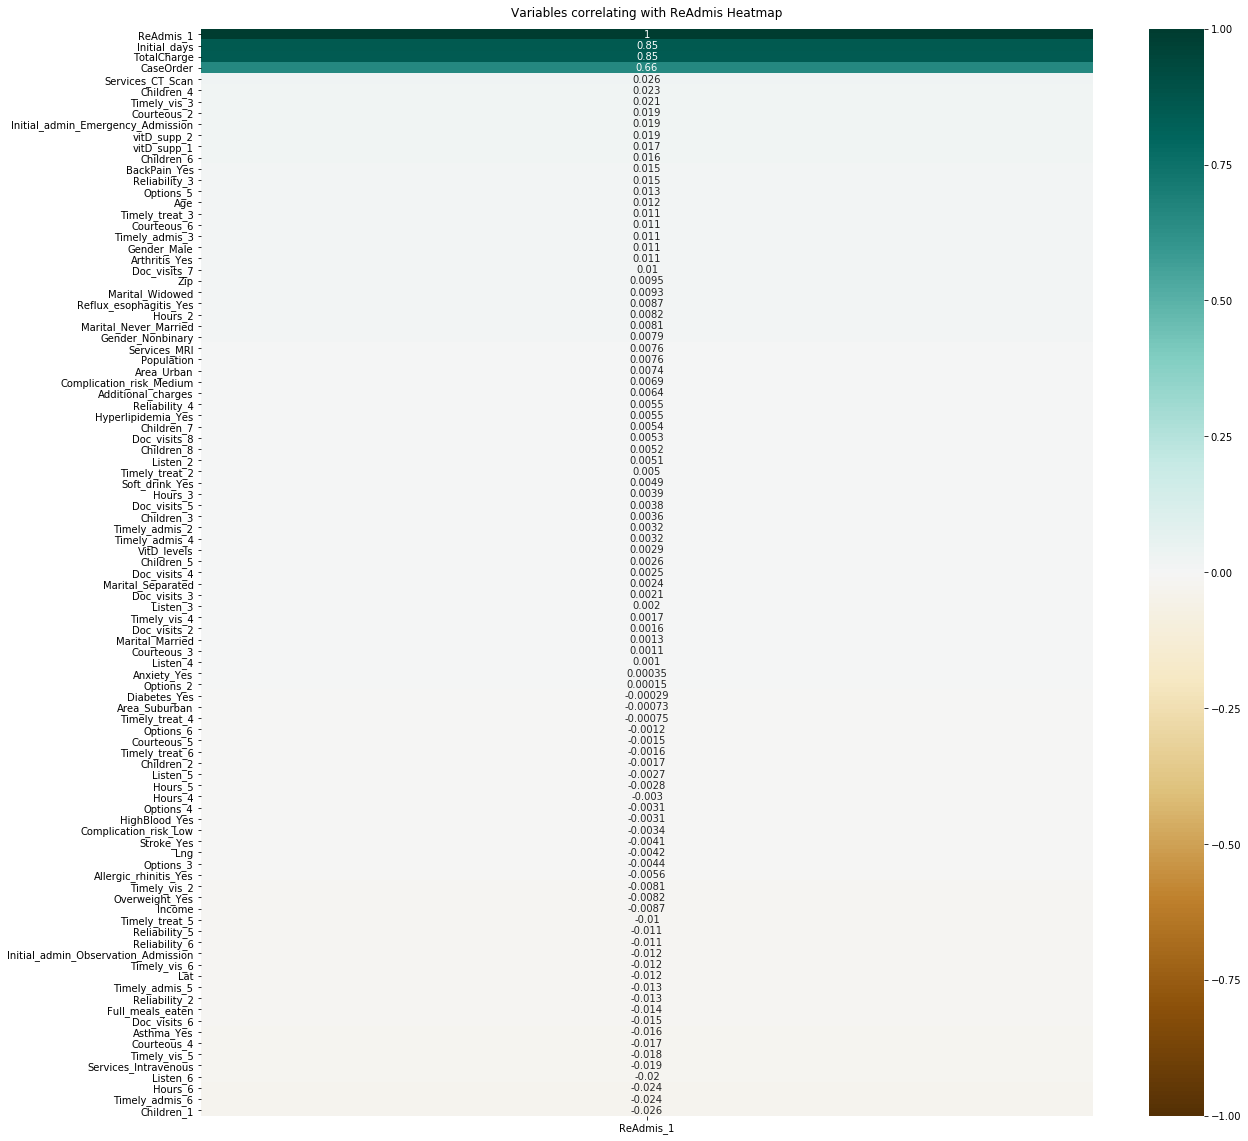

In [46]:
# Heatmap code reference (Seaborn.heatmap, N.d.)
import matplotlib
matplotlib.pyplot.figure(figsize=(20,20))
heatmap = sns.heatmap(df.corr()[['ReAdmis_1']].sort_values(by='ReAdmis_1', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlating with ReAdmis Heatmap',pad=12)

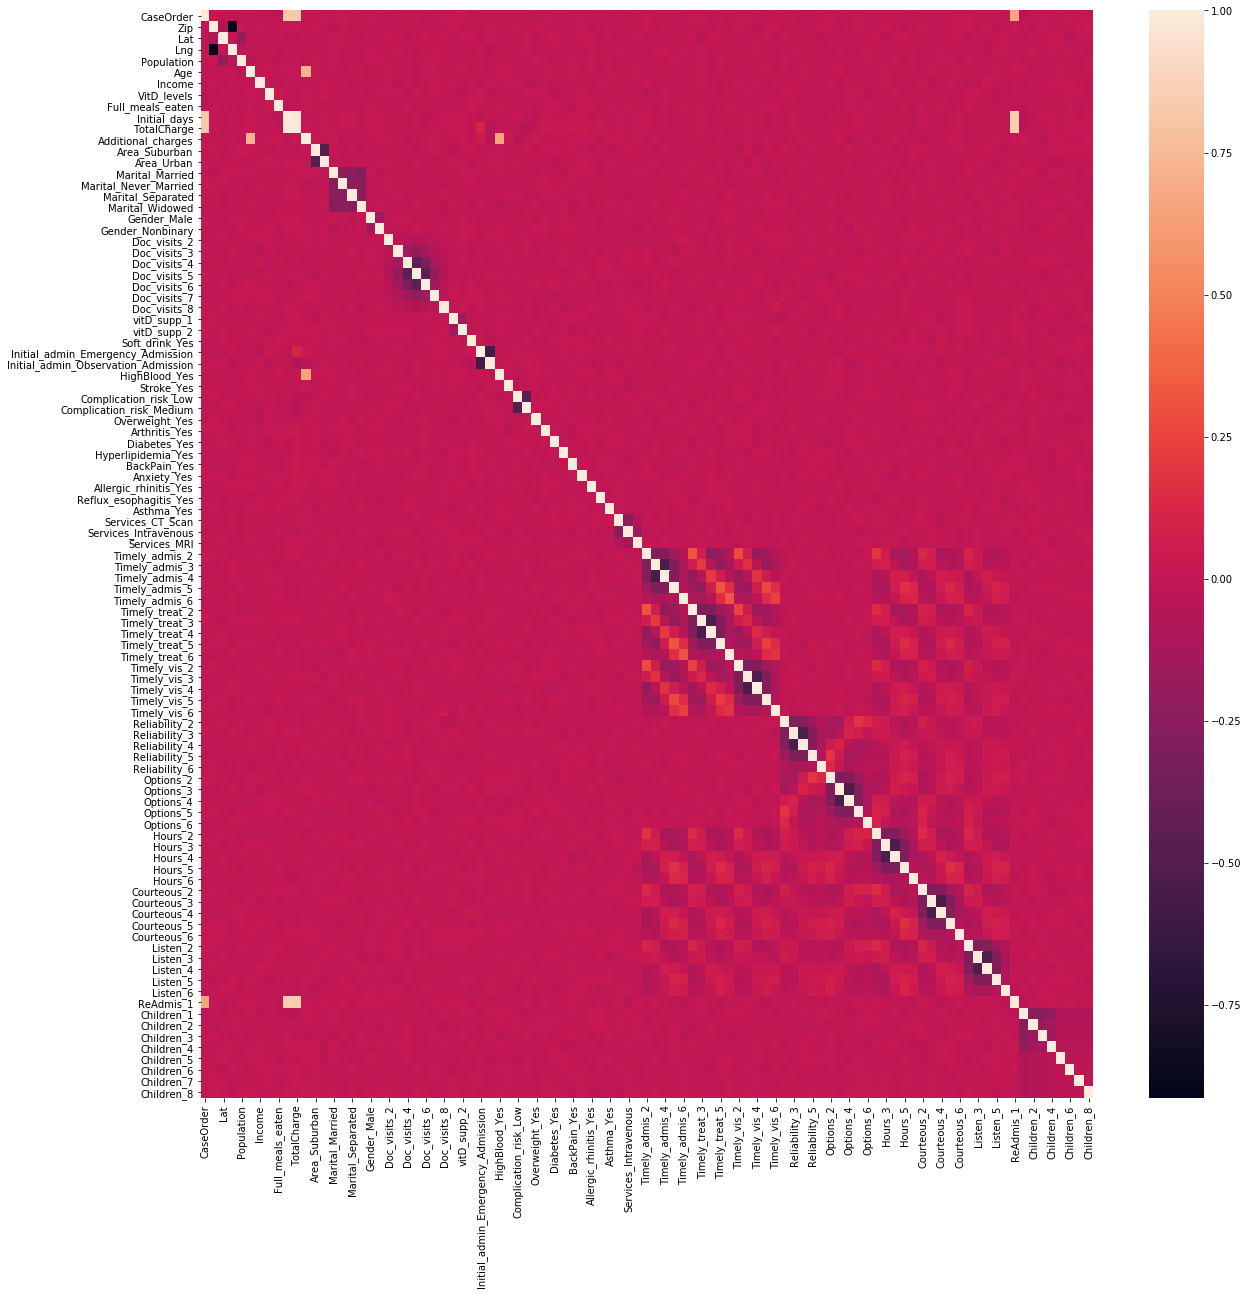

In [47]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()

In [48]:
abs(df.corr()["ReAdmis_1"][abs(df.corr()["ReAdmis_1"])>=0.02].drop('ReAdmis_1')).index.tolist()

['CaseOrder',
 'Initial_days',
 'TotalCharge',
 'Services_CT_Scan',
 'Timely_admis_6',
 'Timely_vis_3',
 'Hours_6',
 'Listen_6',
 'Children_1',
 'Children_4']

In [49]:
# VIF technique code reference (Zach, 2020)

In [50]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('ReAdmis_1 ~ CaseOrder+Initial_days+TotalCharge+Children_1+Children_4+Services_CT_Scan+Timely_vis_3+Timely_admis_6+Listen_6+Hours_6', data=df, return_type='dataframe')
#y, X = dmatrices('Additional_charges ~ CaseOrder+Initial_days+Children_1+Children_6+Initial_days+TotalCharge+Services_CT_Scan+Services_Intravenous+Timely_vis_3+Timely_vis_5+Listen_6', data=df, return_type='dataframe')

In [51]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [52]:
vif

,VIF,variable
0,58.518929,Intercept
1,3.241551,CaseOrder
2,43.023272,Initial_days
3,40.825234,TotalCharge
4,1.042092,Children_1
5,1.041534,Children_4
6,1.001443,Services_CT_Scan
7,1.011799,Timely_vis_3
8,1.023475,Timely_admis_6
9,1.004940,Listen_6


In [53]:
y, X = dmatrices('ReAdmis_1 ~ Initial_days+Children_1+Children_4+Services_CT_Scan+Timely_vis_3+Timely_admis_6+Listen_6+Hours_6', data=df, return_type='dataframe')
#y, X = dmatrices('Additional_charges ~ Population+Children_1+Children_6+Initial_days+vitD_supp_3+Services_CT_Scan+Services_Intravenous+Timely_vis_3+Timely_vis_5+Listen_6', data=df, return_type='dataframe')

In [54]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [55]:
vif

,VIF,variable
0,4.053441,Intercept
1,1.002430,Initial_days
2,1.041870,Children_1
3,1.041375,Children_4
4,1.000610,Services_CT_Scan
5,1.011730,Timely_vis_3
6,1.023351,Timely_admis_6
7,1.004721,Listen_6
8,1.017866,Hours_6


## C2: Summary Statistics for target variable & all predictor variables for inital model

In [56]:
dfi = df[[
 'ReAdmis_1',
 'Children_1',
    'Children_4',
 'Initial_days',
 'Services_CT_Scan',
 'Timely_vis_3',
 'Timely_admis_6',
 'Listen_6',
'Hours_6']]

In [57]:
dfi['ReAdmis_1'].unique()

array([0, 1], dtype=uint8)

In [58]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReAdmis_1         9206 non-null   uint8  
 1   Children_1        9206 non-null   uint8  
 2   Children_4        9206 non-null   uint8  
 3   Initial_days      9206 non-null   float64
 4   Services_CT_Scan  9206 non-null   uint8  
 5   Timely_vis_3      9206 non-null   uint8  
 6   Timely_admis_6    9206 non-null   uint8  
 7   Listen_6          9206 non-null   uint8  
 8   Hours_6           9206 non-null   uint8  
dtypes: float64(1), uint8(8)
memory usage: 215.8 KB


In [59]:
dfi.describe()

,ReAdmis_1,Children_1,Children_4,Initial_days,Services_CT_Scan,Timely_vis_3,Timely_admis_6,Listen_6,Hours_6
count,9206.000000,9206.000000,9206.00000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000
mean,0.366935,0.256137,0.10189,34.399945,0.122855,0.339561,0.020747,0.022268,0.021399
std,0.481995,0.436522,0.30252,26.325319,0.328288,0.473586,0.142545,0.147562,0.144718
min,0.000000,0.000000,0.00000,1.001981,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,7.881412,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,30.841461,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.00000,61.157838,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,71.981490,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
dfi.corr()

,ReAdmis_1,Children_1,Children_4,Initial_days,Services_CT_Scan,Timely_vis_3,Timely_admis_6,Listen_6,Hours_6
ReAdmis_1,1.000000,-0.025936,0.022959,0.852064,0.026087,0.021399,-0.023851,-0.020195,-0.023807
Children_1,-0.025936,1.000000,-0.197647,-0.035131,0.004024,0.001216,0.005373,-0.000857,-0.005948
Children_4,0.022959,-0.197647,1.000000,0.021351,0.004116,-0.008726,-0.001161,-0.002160,-0.017549
Initial_days,0.852064,-0.035131,0.021351,1.000000,0.010723,0.013412,-0.013688,-0.012797,-0.021784
Services_CT_Scan,0.026087,0.004024,0.004116,0.010723,1.000000,-0.016801,-0.005723,0.008555,0.006397
Timely_vis_3,0.021399,0.001216,-0.008726,0.013412,-0.016801,1.000000,-0.094715,-0.028930,-0.050554
Timely_admis_6,-0.023851,0.005373,-0.001161,-0.013688,-0.005723,-0.094715,1.000000,0.045175,0.115398
Listen_6,-0.020195,-0.000857,-0.002160,-0.012797,0.008555,-0.028930,0.045175,1.000000,0.048904
Hours_6,-0.023807,-0.005948,-0.017549,-0.021784,0.006397,-0.050554,0.115398,0.048904,1.000000


In [61]:
dfi.mean()

ReAdmis_1            0.366935
Children_1           0.256137
Children_4           0.101890
Initial_days        34.399945
Services_CT_Scan     0.122855
Timely_vis_3         0.339561
Timely_admis_6       0.020747
Listen_6             0.022268
Hours_6              0.021399
dtype: float64

In [62]:
dfi.median()

ReAdmis_1            0.000000
Children_1           0.000000
Children_4           0.000000
Initial_days        30.841461
Services_CT_Scan     0.000000
Timely_vis_3         0.000000
Timely_admis_6       0.000000
Listen_6             0.000000
Hours_6              0.000000
dtype: float64

In [63]:
dfi.mode()

,ReAdmis_1,Children_1,Children_4,Initial_days,Services_CT_Scan,Timely_vis_3,Timely_admis_6,Listen_6,Hours_6
0,0.0,0.0,0.0,67.42139,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,70.32542,NaN,NaN,NaN,NaN,NaN


In [64]:
# C5: Prepared Dataset
dfi.to_csv('C:/Users/ericy/Desktop/D208.2_prepared.csv', index=False)

In [65]:
# D1: Initial Logistic Regression with logit.  Code Reference (Cosine1509, 2022).
from statsmodels.formula.api import logit

In [66]:
re_log = logit('ReAdmis_1 ~  Initial_days + Children_1 + Children_4 + Services_CT_Scan + Timely_vis_3 + Timely_admis_6 + Listen_6+ Hours_6', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.048161
         Iterations 13


In [67]:
print(re_log.summary())

                           Logit Regression Results                           
Dep. Variable:              ReAdmis_1   No. Observations:                 9206
Model:                          Logit   Df Residuals:                     9197
Method:                           MLE   Df Model:                            8
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.9267
Time:                        18:57:51   Log-Likelihood:                -443.37
converged:                       True   LL-Null:                       -6051.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -54.2497      2.606    -20.815      0.000     -59.358     -49.141
Initial_days         0.9959      0.048     20.902      0.000       0.903       1.089
Children_1          -0.3136 

In [68]:
Xtest = df[['Initial_days','Children_1','Children_4','Services_CT_Scan','Timely_vis_3','Timely_admis_6','Listen_6','Hours_6']]
ytest = df['ReAdmis_1']

p = re_log.predict(Xtest)
prediction = list(map(round, p))

In [69]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
conf_mat = confusion_matrix(ytest, prediction)
print ('Confusion Matrix : \n', conf_mat)
print ('Test Accuracy is ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[5727  101]
 [  94 3284]]
Test Accuracy is  0.9788181620682164


In [93]:
# Reduced model feature selection P(z) < .05
reduced_log = logit('ReAdmis_1 ~  Initial_days+Services_CT_Scan+Timely_vis_3 + Listen_6', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.048351
         Iterations 13


In [94]:
print(reduced_log.summary())

                           Logit Regression Results                           
Dep. Variable:              ReAdmis_1   No. Observations:                 9206
Model:                          Logit   Df Residuals:                     9201
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.9264
Time:                        19:03:58   Log-Likelihood:                -445.12
converged:                       True   LL-Null:                       -6051.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -54.2669      2.602    -20.857      0.000     -59.366     -49.167
Initial_days         0.9950      0.048     20.928      0.000       0.902       1.088
Services_CT_Scan     0.9782 

In [95]:
Xtest1 = df[['Initial_days','Services_CT_Scan','Timely_vis_3','Listen_6']]
ytest1 = df['ReAdmis_1']



In [96]:
g = reduced_log.predict(Xtest1)
prediction = list(map(round, g))

In [97]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
conf_mat1 = confusion_matrix(ytest1, prediction)
print ('Confusion Matrix : \n', conf_mat1)
print ('Test Accuracy is ', accuracy_score(ytest1, prediction))

Confusion Matrix : 
 [[5724  104]
 [  94 3284]]
Test Accuracy is  0.9784922876384966
